# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# combined_results_mice = combined_results.groupby('Mouse ID')

# Display the data table for preview
combined_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice.
mice_number = len(combined_results['Mouse ID'].unique())

mice_number

249

In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse= duplicate_mouse = combined_results.loc[combined_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
# combined_results[combined_results.duplicated(['Mouse ID','Timepoint'])]

duplicate_mouse

array(['g989'], dtype=object)

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
# duplicate_mouse= duplicate_mice[duplicate_mice.duplicated()]
# duplicate_mouse
mouse_id= 'g989'
duplicate_results= combined_results.loc[combined_results['Mouse ID']==mouse_id]

duplicate_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_combined_results=combined_results[combined_results['Mouse ID']!='g989']
# duplicate_mouse= combined_results.loc[combined_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dropped_combined_results.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [13]:
# Checking the number of mice in the clean DataFrame.
mice_number_drop = len(dropped_combined_results['Mouse ID'].unique())
mice_number_drop

248

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_mice= dropped_combined_results.groupby('Drug Regimen')

tumor_mean = summary_mice['Tumor Volume (mm3)'].mean()
tumor_median = summary_mice['Tumor Volume (mm3)'].median()
tumor_variance = summary_mice['Tumor Volume (mm3)'].var()
tumor_std = summary_mice['Tumor Volume (mm3)'].std()
tumor_sem = summary_mice['Tumor Volume (mm3)'].sem()

# tumor_mean

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 


# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({'Mean Tumor Volume': tumor_mean,'Median Tumor Volume': tumor_median, 'Tumor Volume Variance': tumor_variance,'Tumor Volume Std. Dev.':tumor_std,'Tumor Volume Std. Err.':tumor_sem })
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_df2 =dropped_combined_results[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])
summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

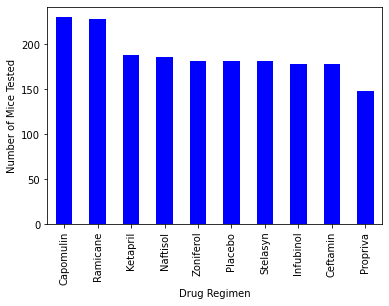

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# x_values=dropped_combined_results['Drug Regimen']
# y_values=dropped_combined_results['Mouse ID'].count()


# plt.bar(x_values, y_values, color='b', align='center')

bar_plot = dropped_combined_results['Drug Regimen'].value_counts().plot.bar(color='b', align='center')


plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


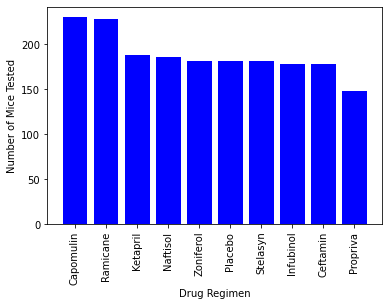

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_count= dropped_combined_results['Drug Regimen'].value_counts()
x_axis =np.arange(len(drug_count))


plt.bar(x_axis, drug_count, color='b', align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_count.index)

plt.xticks(rotation='vertical')

# plt.xlim(-0.75, len(x_axis)-0.25)
# plt.ylim(0, max(y_axis)+0.4)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()

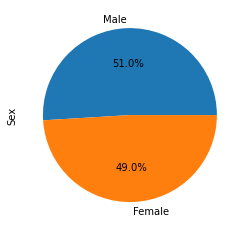

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

pie_data = dropped_combined_results['Sex'].value_counts()

pie_plot = pie_data.plot.pie(autopct="%1.1f%%")

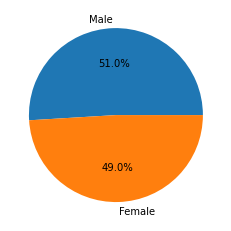

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_data = dropped_combined_results['Sex'].value_counts()

plt.pie(pie_data, labels = pie_data.index, autopct="%1.1f%%")

plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = pd.DataFrame(dropped_combined_results.groupby('Mouse ID')['Timepoint'].max())
last_timepoint
    

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

timepoint_merged = pd.merge(dropped_combined_results, last_timepoint, on='Mouse ID')
timepoint_merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3),Metastatic Sites,Timepoint_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [21]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes


    
for treatment in treatments:

    # treatment_df = timepoint_merged.loc[timepoint_merged['Tumor Volume (mm3)']]
    treatment_df = timepoint_merged.loc[timepoint_merged['Drug Regimen']==treatment, 'Tumor Volume (mm3)']

    tumor_vol.append(treatment_df)

    quartiles = treatment_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    outliers_count =(timepoint_merged['Tumor Volume (mm3)'].loc[(timepoint_merged['Tumor Volume (mm3)']>= upper_bound) | (timepoint_merged['Tumor Volume (mm3)']<= lower_bound)])

    print (f'{treatment}s potential outliers: {outliers_count}')


Capomulins potential outliers: 7       26.546993
8       24.365505
9       22.050126
18      25.472143
19      23.343598
          ...    
1875    63.145652
1876    65.841013
1877    69.176246
1878    70.314904
1879    73.867845
Name: Tumor Volume (mm3), Length: 492, dtype: float64
Ramicanes potential outliers: 9       22.050126
19      23.343598
460     59.523197
461     61.931650
462     63.593490
          ...    
1875    63.145652
1876    65.841013
1877    69.176246
1878    70.314904
1879    73.867845
Name: Tumor Volume (mm3), Length: 405, dtype: float64
Infubinols potential outliers: 6       31.099498
7       26.546993
8       24.365505
9       22.050126
17      28.328531
18      25.472143
19      23.343598
27      30.206825
28      28.167397
29      28.484033
36      31.758275
37      30.834357
38      31.378045
39      28.430964
47      30.960392
48      31.369406
49      29.128472
59      30.276232
64      30.485985
74      30.564625
84      30.638696
93      31.001861
94      

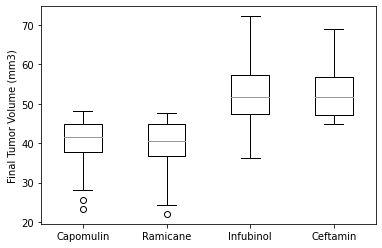

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_vol)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4], ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin'])

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

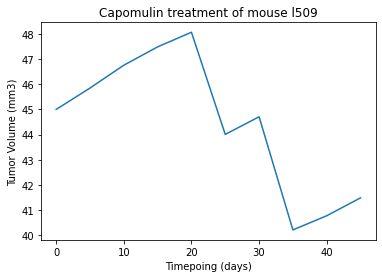

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


mouse_df = timepoint_merged.loc[timepoint_merged['Mouse ID']=='l509']

plt.plot(mouse_df['Timepoint_x'], mouse_df['Tumor Volume (mm3)'])

plt.xlabel('Timepoing (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

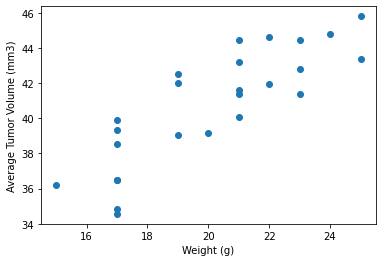

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df = timepoint_merged.loc[timepoint_merged['Drug Regimen']=='Capomulin']

cap_ave_vol= pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())
cap_ave_weight = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Weight (g)'].mean())

# x_values= cap_ave_vol
# y_values = capomulin_df['Weight (g)']

# plt.scatter(x_values, y_values)

plt.scatter(cap_ave_weight, cap_ave_vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


In [27]:

from scipy.stats import linregress
from sklearn import datasets


## Correlation and Regression

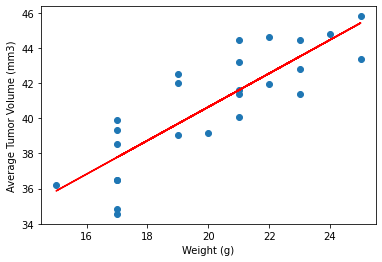

The correlation between mouse weight and the average tumor volume is(0.841936342469472, 1.3225722434712483e-07)


In [73]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



capomulin_df =timepoint_merged.loc[timepoint_merged['Drug Regimen']=='Capomulin']

cap_ave_vol= capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
cap_ave_weight = capomulin_df.groupby('Mouse ID')['Weight (g)'].mean()

# complete_df = pd.merge(capomulin_df,cap_ave_vol,cap_ave_weight,how='outer'on='Mouse ID')

y_values= cap_ave_vol
x_values = cap_ave_weight

correlation =st.pearsonr(x_values,y_values)


(slope, intercept, rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(0,9),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

print(f'The correlation between mouse weight and the average tumor volume is{correlation}')